In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install jcopml

warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


# Data Extracting

In [3]:
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')

# Data Transforming

In [4]:
# get info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
# tranform data type
df['PaymentTier']=df['PaymentTier'].astype(str)
df['LeaveOrNot']=df['LeaveOrNot'].astype(str)
df['JoiningYear']=df['JoiningYear'].astype(str)

In [6]:
# check null data
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
# check duplicated data
df[df.duplicated()==True]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


Because the data does not have a "name" and "unique_code" columns, there may be duplicated data.

In [8]:
# check percentase of target feature
df.LeaveOrNot.value_counts(normalize=True)

LeaveOrNot
0    0.656136
1    0.343864
Name: proportion, dtype: float64

# Exploratory Data Analyst 

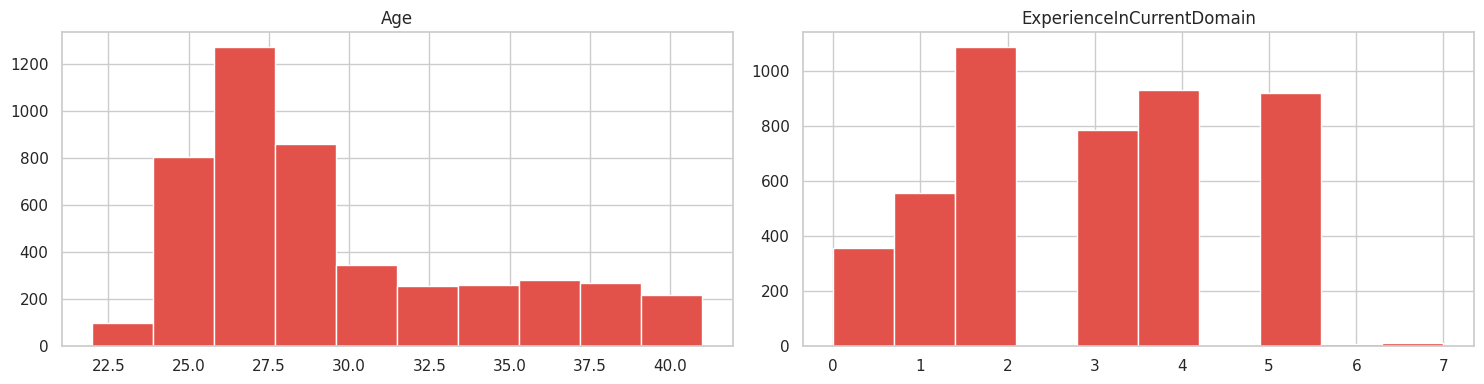

In [9]:
# data understanding
df.hist(figsize=(15, 4))
plt.tight_layout()
plt.show()

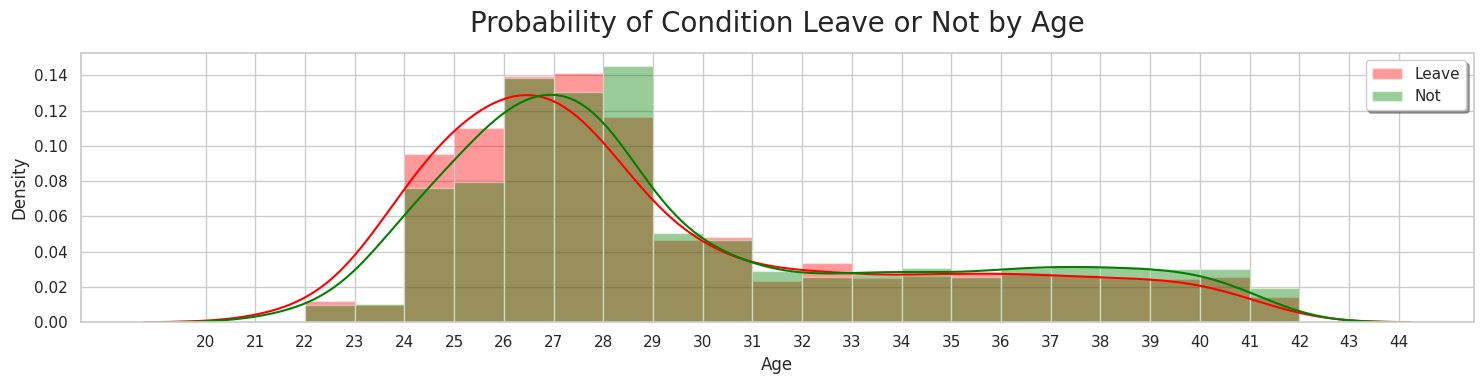

In [10]:
bins=np.arange(20, 45, 1)
plt.figure(figsize=(15, 4))
plt.title('Probability of Condition Leave or Not by Age', fontsize=20, pad=15)
sns.distplot(df[df.LeaveOrNot=='1'].Age, label='Leave', bins=bins, color='red')
sns.distplot(df[df.LeaveOrNot=='0'].Age, label='Not', bins=bins, color='green')
plt.xticks(bins, bins)
plt.legend(shadow=True)
plt.tight_layout()
plt.show()

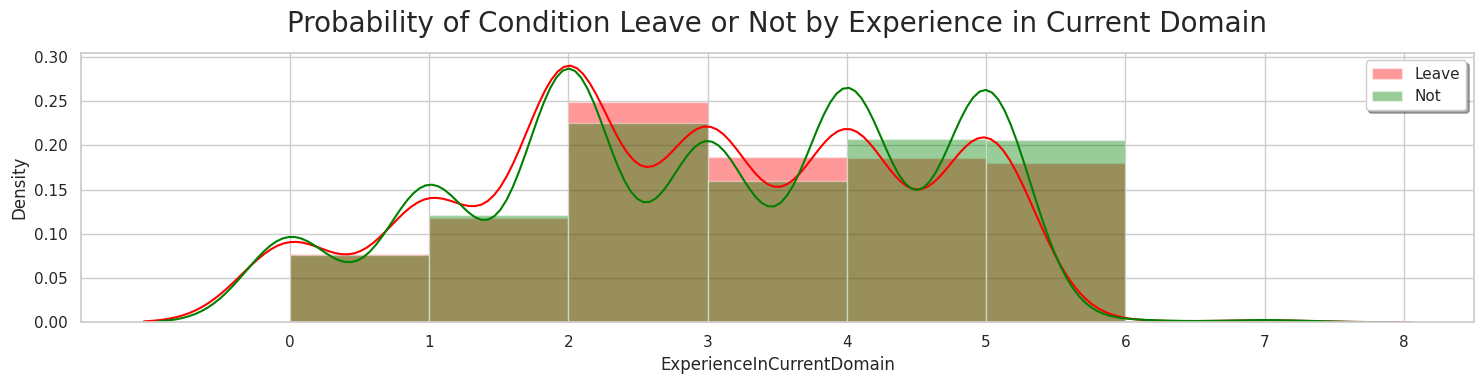

In [11]:
bins=np.arange(0, 9, 1)
plt.figure(figsize=(15, 4))
plt.title('Probability of Condition Leave or Not by Experience in Current Domain', fontsize=20, pad=15)
sns.distplot(df[df.LeaveOrNot=='1'].ExperienceInCurrentDomain, label='Leave', color='red', bins=bins)
sns.distplot(df[df.LeaveOrNot=='0'].ExperienceInCurrentDomain, label='Not', color='green', bins=bins)
plt.xticks(bins, bins)
plt.legend(shadow=True)
plt.tight_layout()
plt.show()

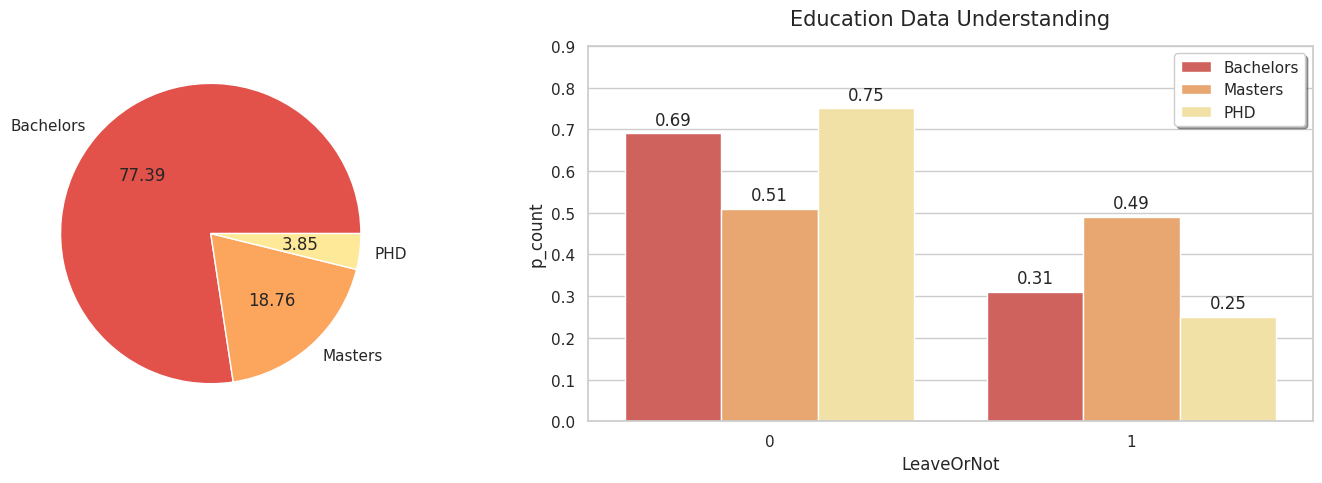

In [12]:
# check education
data1=df.Education.value_counts().reset_index()
data2=df.groupby(['Education','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Education.unique():
    msg=data2[data2.Education==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Education'], autopct='%.2f')
ax[1].set_title('Education Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Education', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

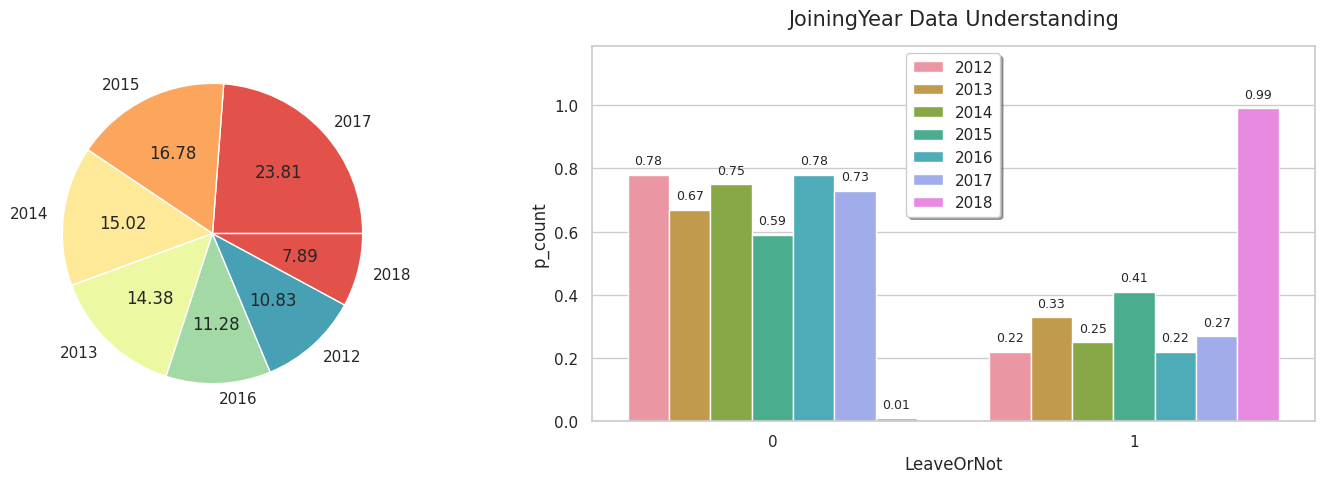

In [13]:
# check JoiningYear
data1=df.JoiningYear.value_counts().reset_index()
data2=df.groupby(['JoiningYear','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.JoiningYear.unique():
    msg=data2[data2.JoiningYear==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['JoiningYear'], autopct='%.2f')
ax[1].set_title('JoiningYear Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='JoiningYear', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

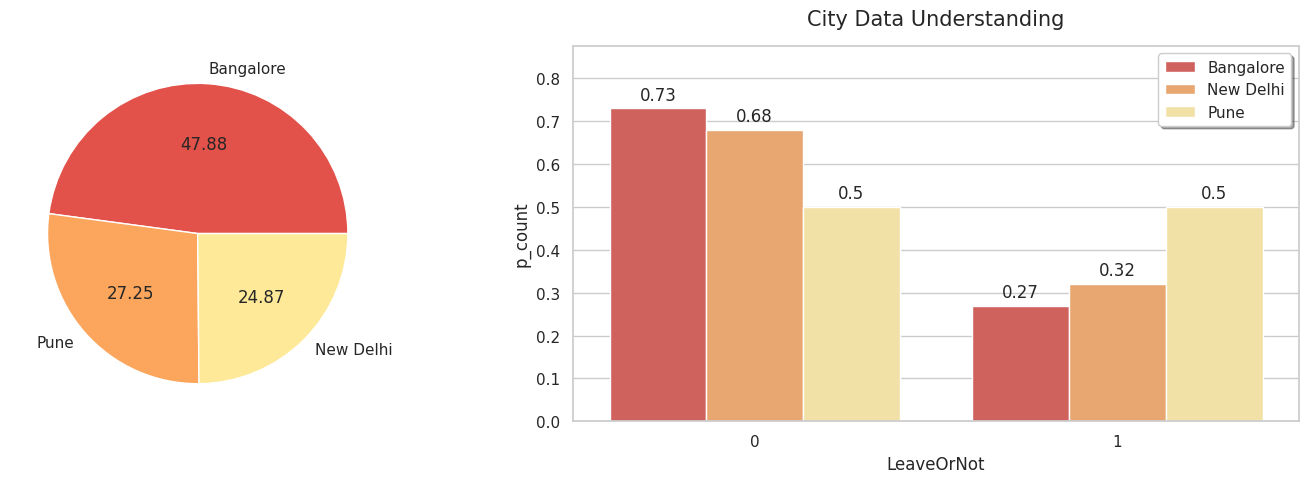

In [14]:
# check City
data1=df.City.value_counts().reset_index()
data2=df.groupby(['City','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.City.unique():
    msg=data2[data2.City==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['City'], autopct='%.2f')
ax[1].set_title('City Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='City', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

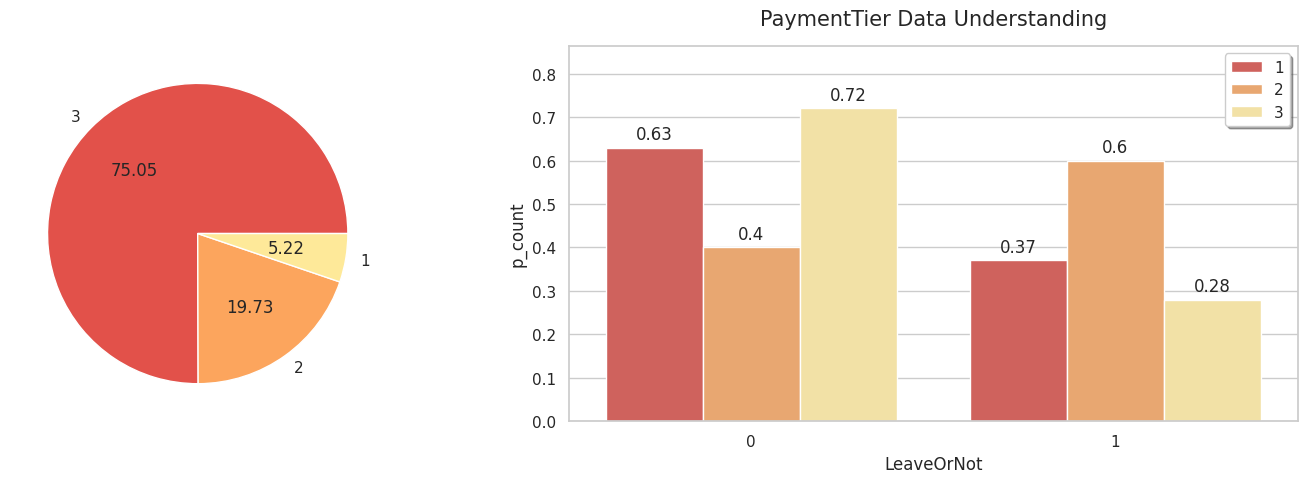

In [15]:
# check PaymentTier
data1=df.PaymentTier.value_counts().reset_index()
data2=df.groupby(['PaymentTier','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.PaymentTier.unique():
    msg=data2[data2.PaymentTier==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['PaymentTier'], autopct='%.2f')
ax[1].set_title('PaymentTier Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='PaymentTier', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

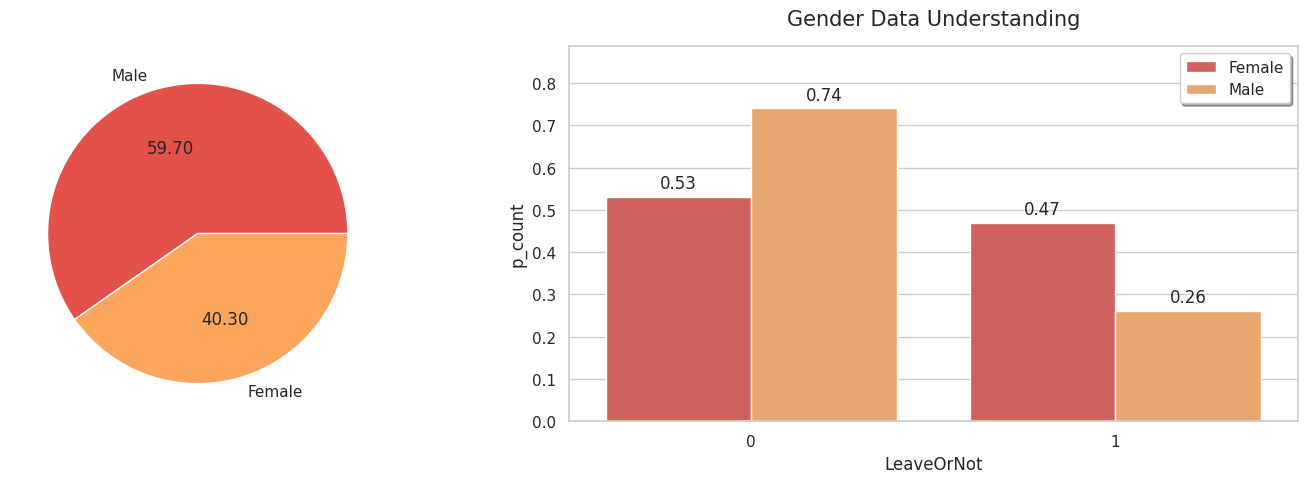

In [16]:
# check Gender
data1=df.Gender.value_counts().reset_index()
data2=df.groupby(['Gender','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Gender.unique():
    msg=data2[data2.Gender==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Gender'], autopct='%.2f')
ax[1].set_title('Gender Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Gender', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

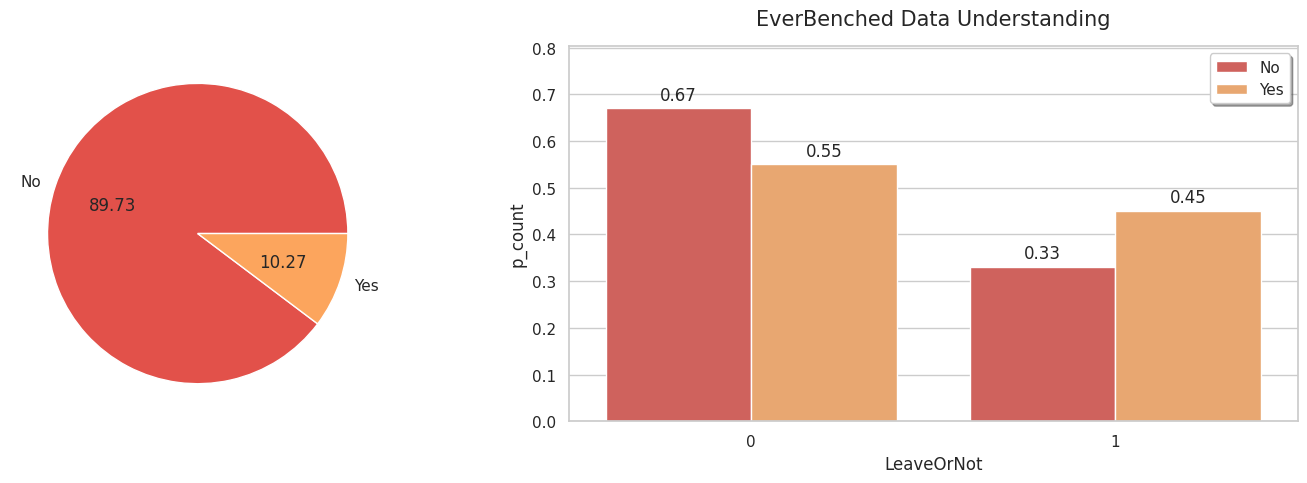

In [17]:
# check EverBenched
data1=df.EverBenched.value_counts().reset_index()
data2=df.groupby(['EverBenched','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.EverBenched.unique():
    msg=data2[data2.EverBenched==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['EverBenched'], autopct='%.2f')
ax[1].set_title('EverBenched Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='EverBenched', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

# Feature Importance

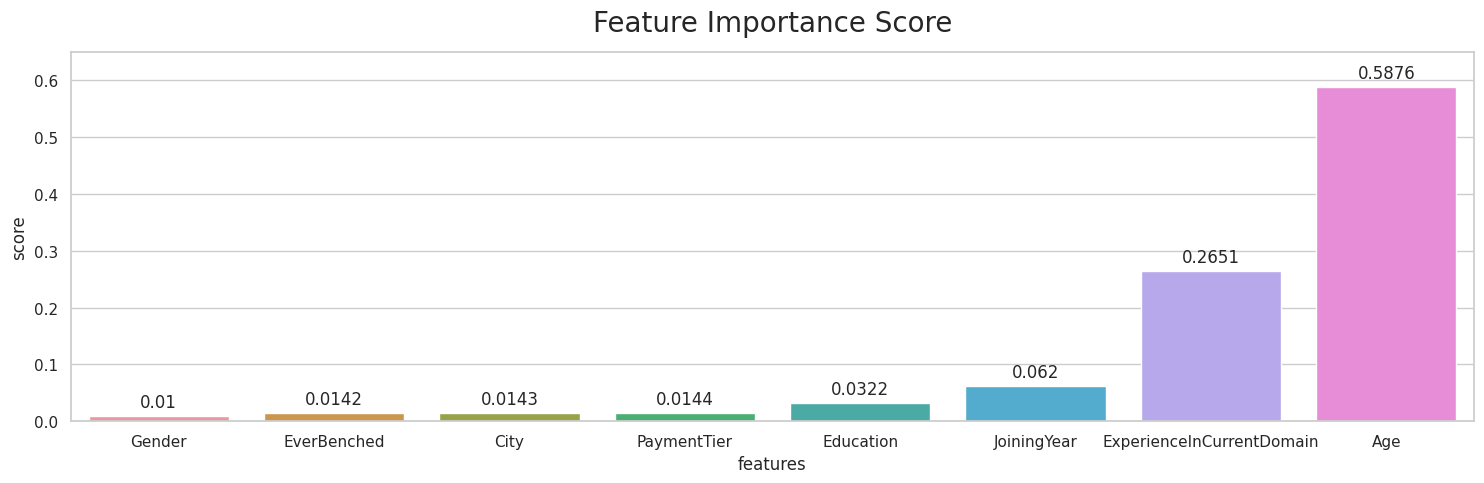

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# identify the model and scaling function
model = RandomForestClassifier()
scale = MinMaxScaler()

# create labeling function
def LabelFunc(values):
    msg1=pd.DataFrame({
        'name':np.unique(values).tolist(),
        'label':np.arange(len(np.unique(values))).tolist()
    })
    
    msg2=pd.DataFrame({'name':values})
    msg2=msg2.merge(msg1, how='inner', on='name')
    
    return msg2['label'].tolist()

# split data feature and data target
x=df.drop(columns=['LeaveOrNot'])
y=df[['LeaveOrNot']]

# categorical transform
for cate in x.select_dtypes('object').columns:
    x[cate] = LabelFunc(x[cate].tolist())
    
# numerical transform
for num in x.select_dtypes('number').columns:
    x[num] = scale.fit_transform(x[num].values.reshape(-1, 1))

# train the model to get the feature importance
model.fit(x, y)
importance = pd.DataFrame({
    'features':model.feature_names_in_.tolist(),
    'score':model.feature_importances_
})
importance.sort_values('score', ascending=True, inplace=True)

# show the importance features and score
plt.figure(figsize=(15, 5))
plt.title('Feature Importance Score', fontsize=20, pad=15)
bar_plot = sns.barplot(importance, x='features', y='score')

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{np.round(p.get_height(), 4)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.ylim(ymin=0, ymax=0.65)
plt.tight_layout()
plt.show()

# Machine Learning

## Supervised Learning with best models

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from jcopml.tuning import grid_search_params as gsp
from sklearn.model_selection import train_test_split, GridSearchCV

# split data feature and data target
x=df.drop(columns=['LeaveOrNot'])
y=df[['LeaveOrNot']]

# split data feature and target into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [236]:
# create params of DecisionTreeRegressor in dictoary datatype
tree_params = {'algo__max_depth' : [n for n in range(10, 100, 20)],
          'algo__max_depth' : [n for n in range(3, 10, 2)],
          'algo__max_features' : ['auto', 'sqrt', 'log2'],
          'algo__min_samples_split' : [2, 4, 6]}

# create models dataframe
models=pd.DataFrame({
    'method':[KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()],
    'params':[gsp.knn_params, gsp.svm_params, tree_params, gsp.rf_params]
})

In [237]:
# create categorical pipeline
cate_pipe=Pipeline([
    ('encoder', OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore'))
])

# create numerical pipeline
num_pipe=Pipeline([
    ('scale', MinMaxScaler())
])

# create processor for transformer
processor = ColumnTransformer([
    ('categorical', cate_pipe, x.select_dtypes('object').columns.tolist()),
    ('numerical', num_pipe, x.select_dtypes('number').columns.tolist())
])

In [239]:
reports=[]
for i in range(len(models)):
    try:
        # get the model by index
        model=models[models.index==i]

        # methode and params
        method=model.method[i]
        params=model.params[i]

        # create pipeline
        pipeline=Pipeline([
            ('proces', processor),
            ('algo', method)
        ])

        # get the best params for the method
        model_n=GridSearchCV(pipeline, param_grid=params)
        model_n.fit(x_train, y_train)

        # create report and append to reports list
        report=pd.DataFrame({
            'method':[method],
            'best_params':[model_n.best_params_],
            'best_score':[np.round(model_n.best_score_, 3)],
            'train_score':[float(np.round(model_n.score(x_train, y_train), 3))],
            'test_score':[float(np.round(model_n.score(x_test, y_test), 3))]
        })
    except:
        report=pd.DataFrame({
            'method':[method],
            'best_params':[],
            'best_score':[],
            'train_score':[],
            'test_score':[]
        })
    
    reports.append(report)

# concat the list reports
reports=pd.concat(reports).reset_index(drop=True)

# merge the models dataframe to reports
models_report=models.merge(reports, on='method')

In [240]:
models_report

,method,params,best_params,best_score,train_score,test_score
0,KNeighborsClassifier(),"{'algo__n_neighbors': [1, 3, 5, 7, 9, 11, 13, ...","{'algo__n_neighbors': 9, 'algo__p': 1, 'algo__...",0.833,0.858,0.846
1,SVC(),"{'algo__gamma': [0.001, 0.01, 0.1, 1.0, 10.0, ...","{'algo__C': 100.0, 'algo__gamma': 0.1}",0.847,0.869,0.856
2,DecisionTreeClassifier(),"{'algo__max_depth': [3, 5, 7, 9], 'algo__max_f...","{'algo__max_depth': 9, 'algo__max_features': '...",0.827,0.855,0.842
3,RandomForestClassifier(),"{'algo__n_estimators': [100, 150, 200], 'algo_...","{'algo__max_depth': 80, 'algo__max_features': ...",0.858,0.872,0.864
